In [176]:
import numpy as np
import pandas
import pandas as pd
from IPython.core.pylabtools import figsize

from ISLP import load_data
from numpy.lib.histograms import histogram
from sympy.stats import Logistic

# Data Loading and Prepration


In [177]:
Data = load_data('Auto')
med = np.median(Data['mpg'].values)
Data['mpg01'] = [1 if m > med else 0 for m in Data['mpg'].values]

Data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2,1
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1,1


# Graphic Data exploration


### Classes vs predictor values plots

In [178]:
import matplotlib.pyplot as plt

def plot_classes(predictor_name:str, ax:plt.Axes) -> plt.Axes:
    above_med = Data[Data['mpg01'] == 1][predictor_name].values
    below_med = Data[Data['mpg01'] == 0][predictor_name].values

    ax.set_title(f'MPG above Median for {predictor_name}')
    ax.scatter(above_med, [0] * len(above_med), color='r', label='Above Median', s=20)
    ax.scatter(below_med, [.1] * len(below_med), color='b', label='Below Median', s=20)

    ax.set_xlabel(predictor_name)
    ax.set_ylim((-0.1, 0.2))
    ax.set_yticks([]) # Remove y-axis ticks
    ax.legend(loc='upper right')

    return ax




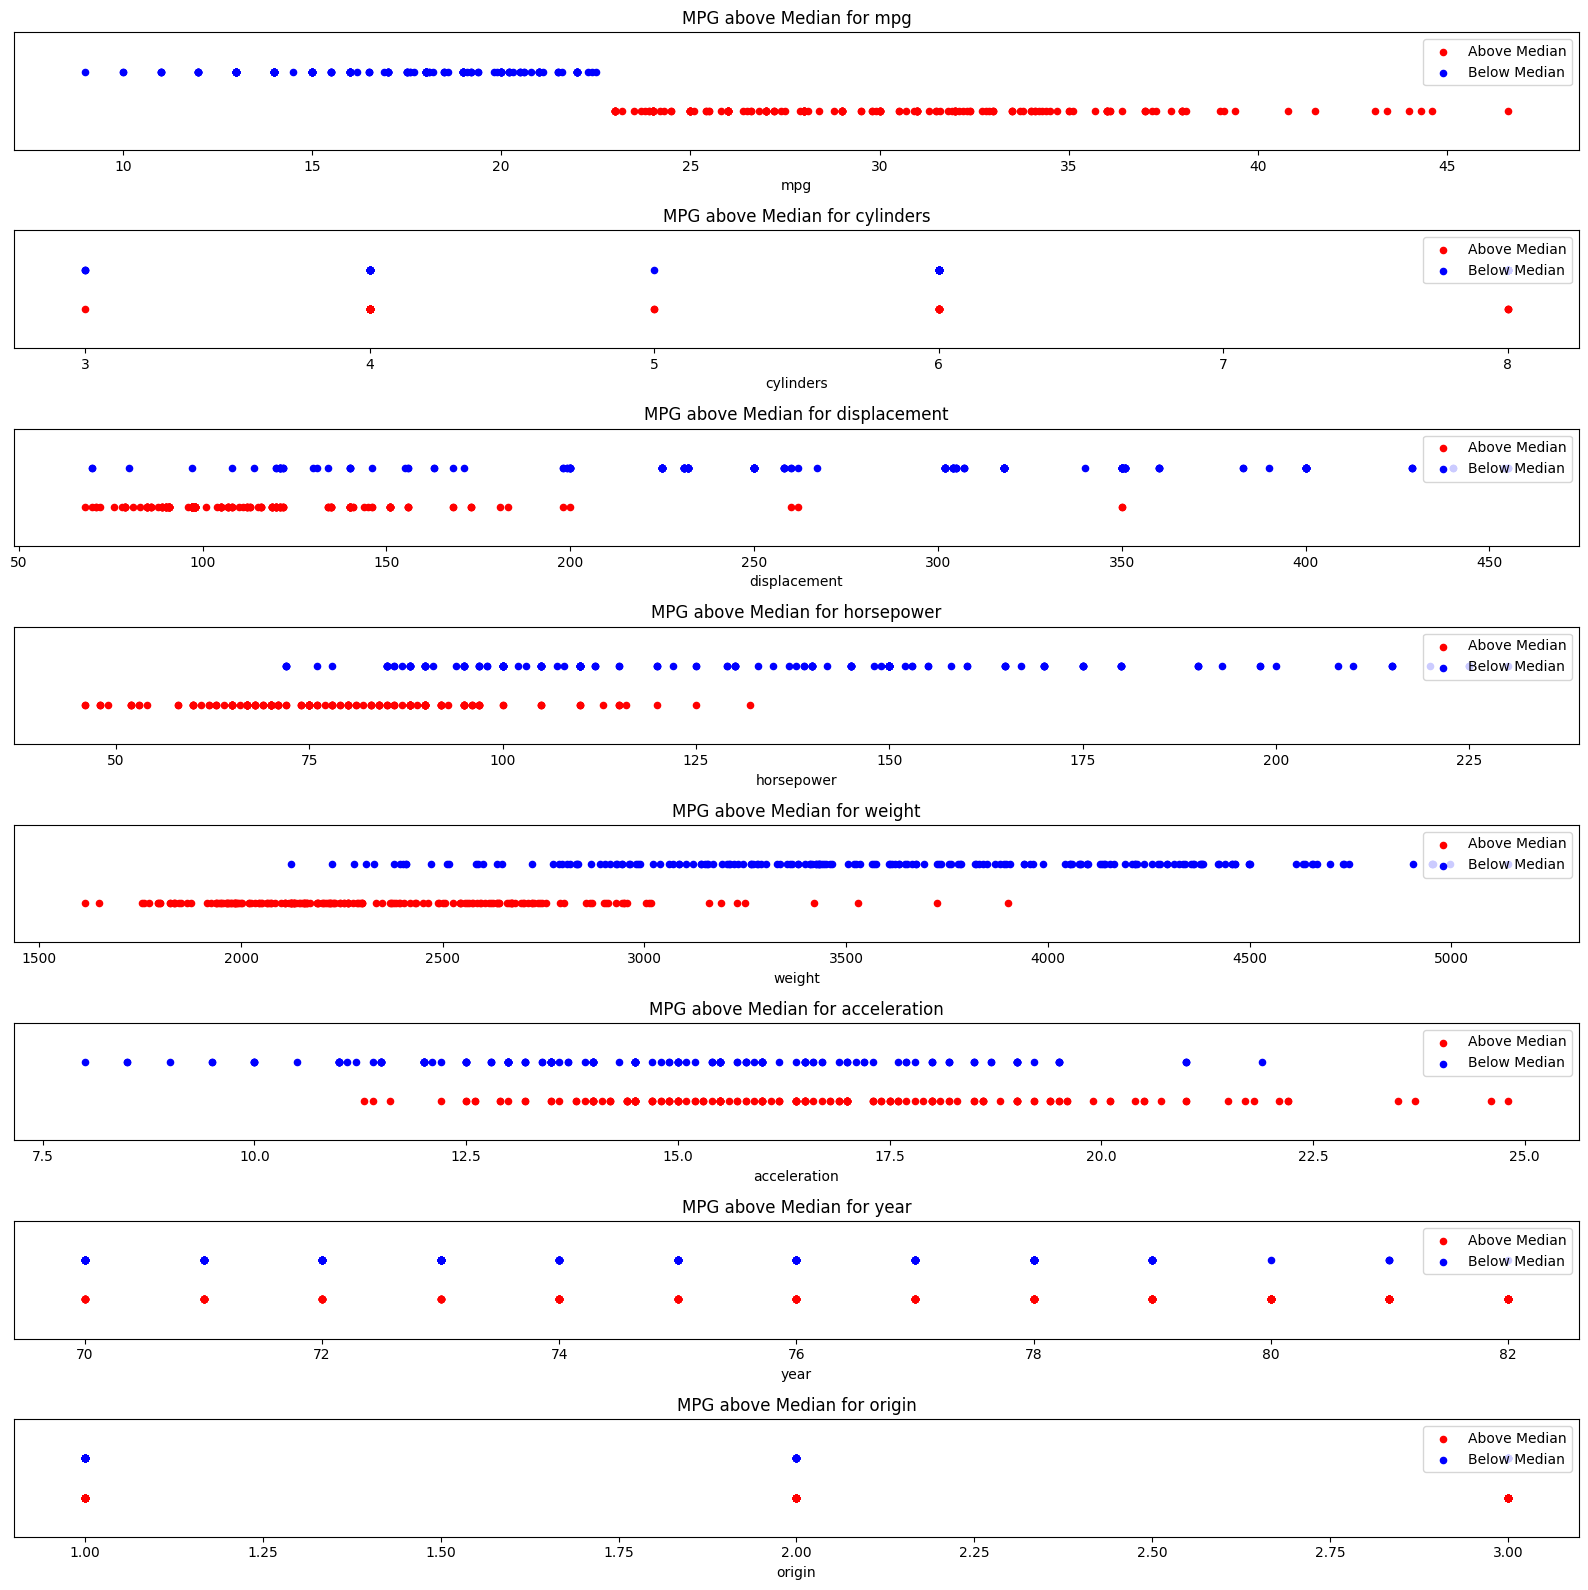

In [179]:
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

ax = plt.subplots(len(names), 1,figsize = (16, 2*len(names) ))[1]
for idx, predictor_name in enumerate(names):
    plot_classes(predictor_name, ax[idx])


plt.tight_layout()
plt.show()



## Box Plots

In [180]:
def plot_boxes(predictor_name: str, ax: plt.Axes) -> plt.Axes:
    above_med = Data[Data['mpg01'] == 1][predictor_name].values
    below_med = Data[Data['mpg01'] == 0][predictor_name].values

    data_to_plot = [below_med, above_med]
    labels_to_use = ['Below Median (0)', 'Above Median (1)']

    box_plot = ax.boxplot(
        data_to_plot,
        vert=True,          # Vertical boxes
        patch_artist=True,  # Allows filling boxes with color
        tick_labels=labels_to_use
    )

    ax.set_title(f'Distribution of {predictor_name} by MPG Class')
    ax.set_xlabel('MPG Class (mpg01)')
    ax.set_ylabel(predictor_name)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    return ax


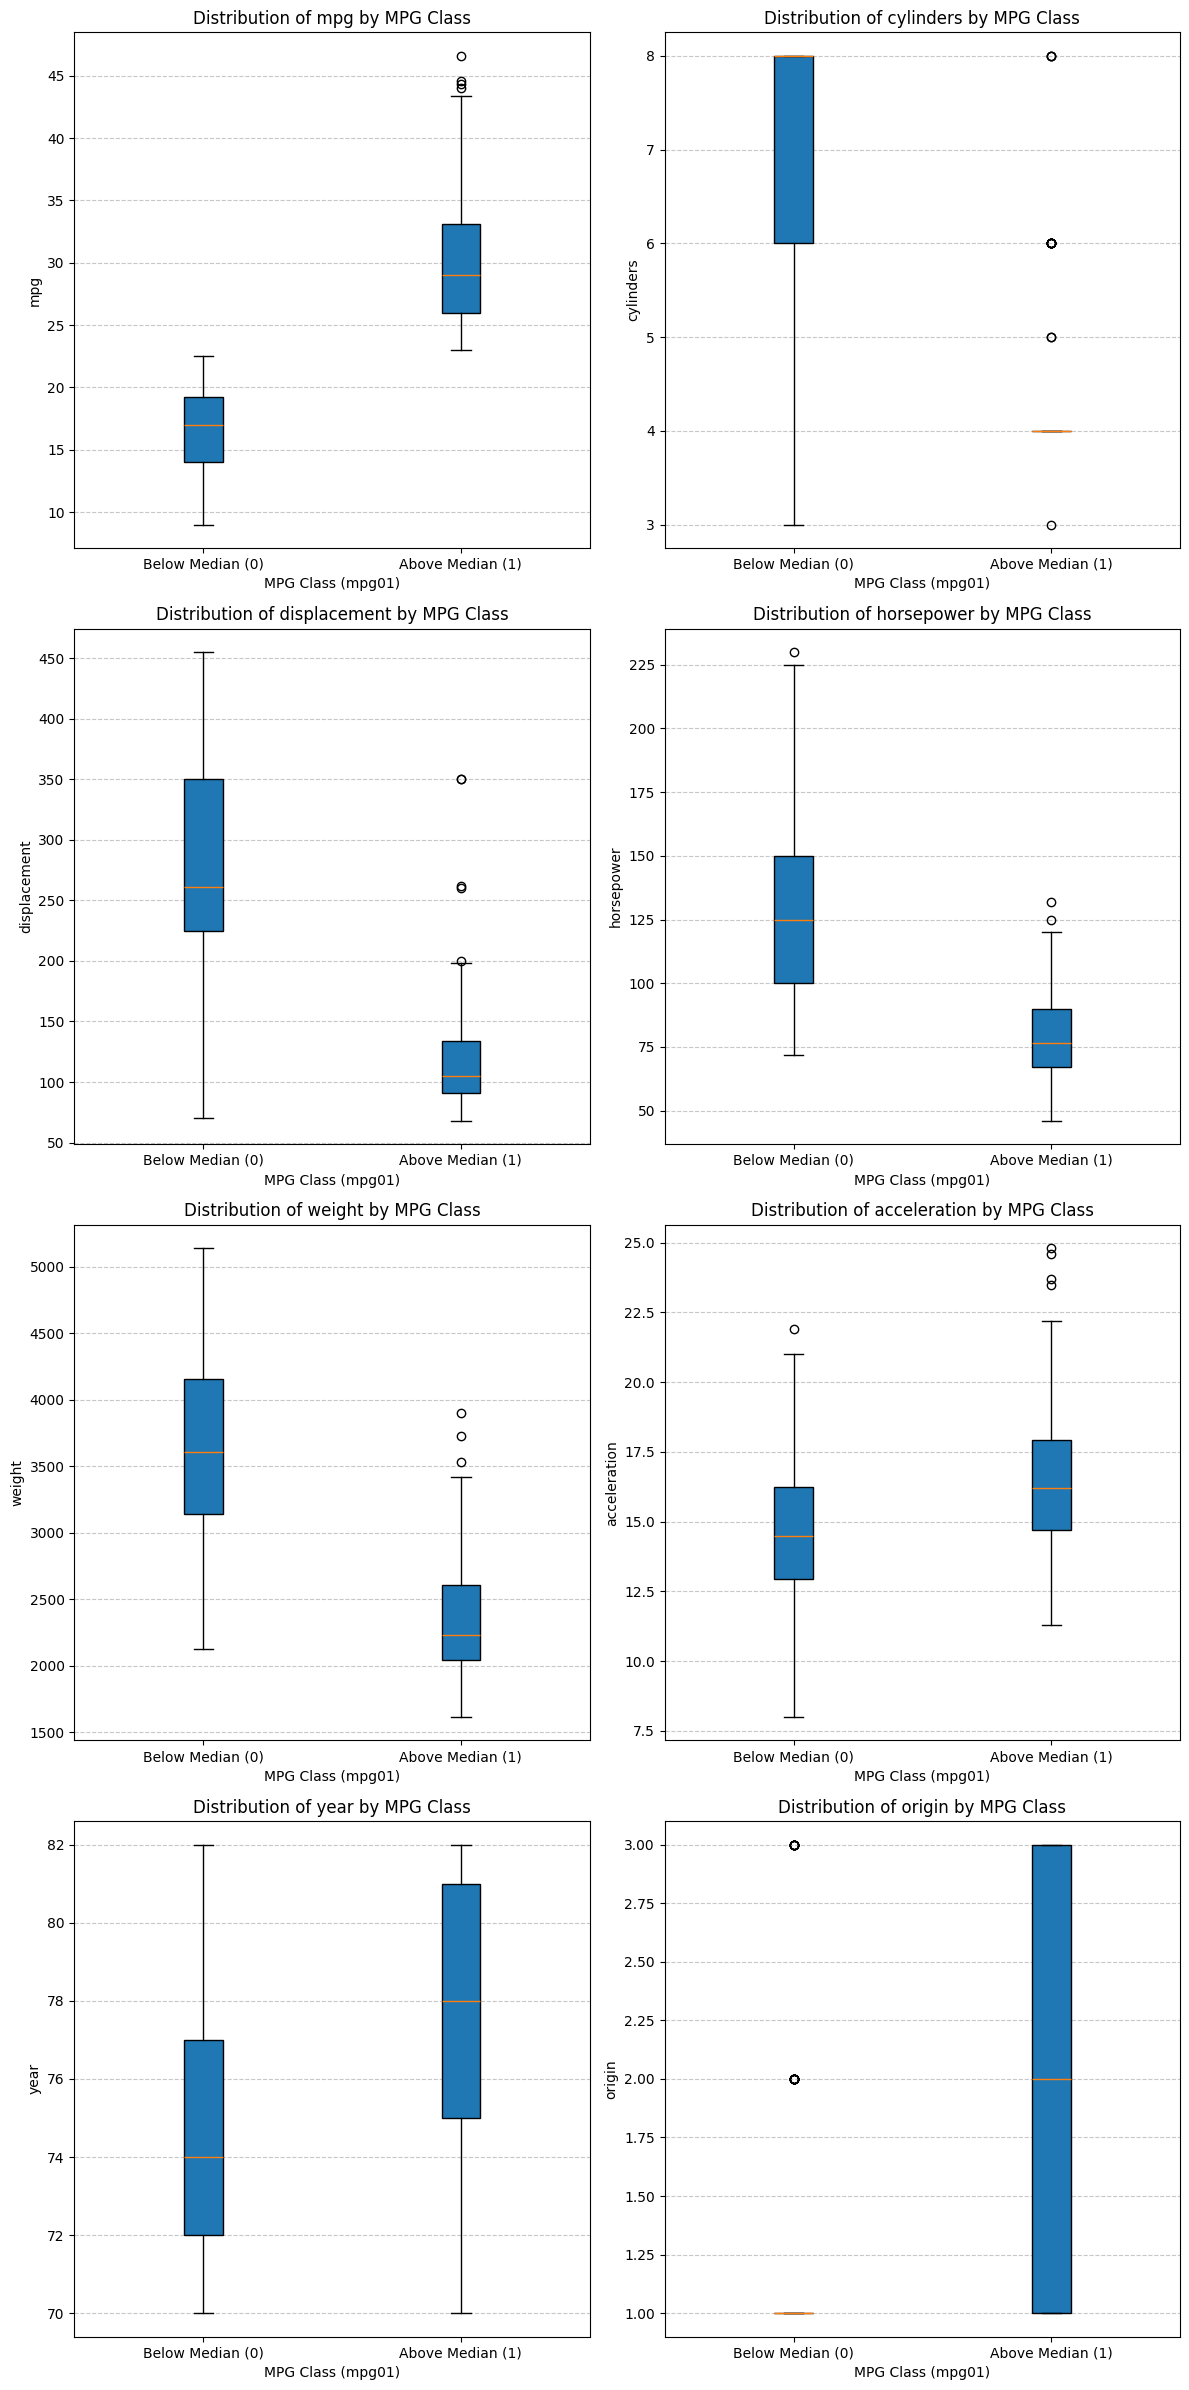

In [181]:
ax = plt.subplots(int(len(names)/2), 2,figsize = (12, 3*len(names) ))[1]
for idx in range(0,int(len(names)),2):
    p_idx = int(idx/2)
    plot_boxes(names[idx], ax[p_idx][0])
    plot_boxes(names[idx+1], ax[p_idx][1])

plt.tight_layout()
plt.show()

### Scatter Matrix (Data corellation)

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

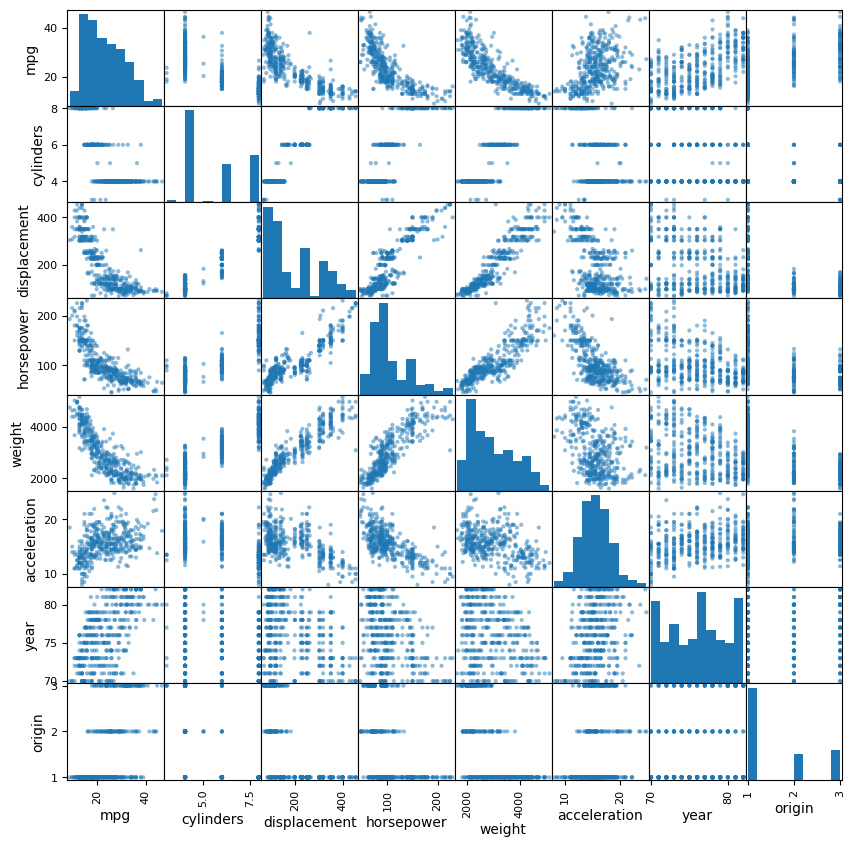

In [182]:
from pandas.plotting import  scatter_matrix

scatter_matrix(Data[names], figsize=(10,10))

# Prediction Models


### Test Train Split
and choosing predictors

### Choosing Predictors

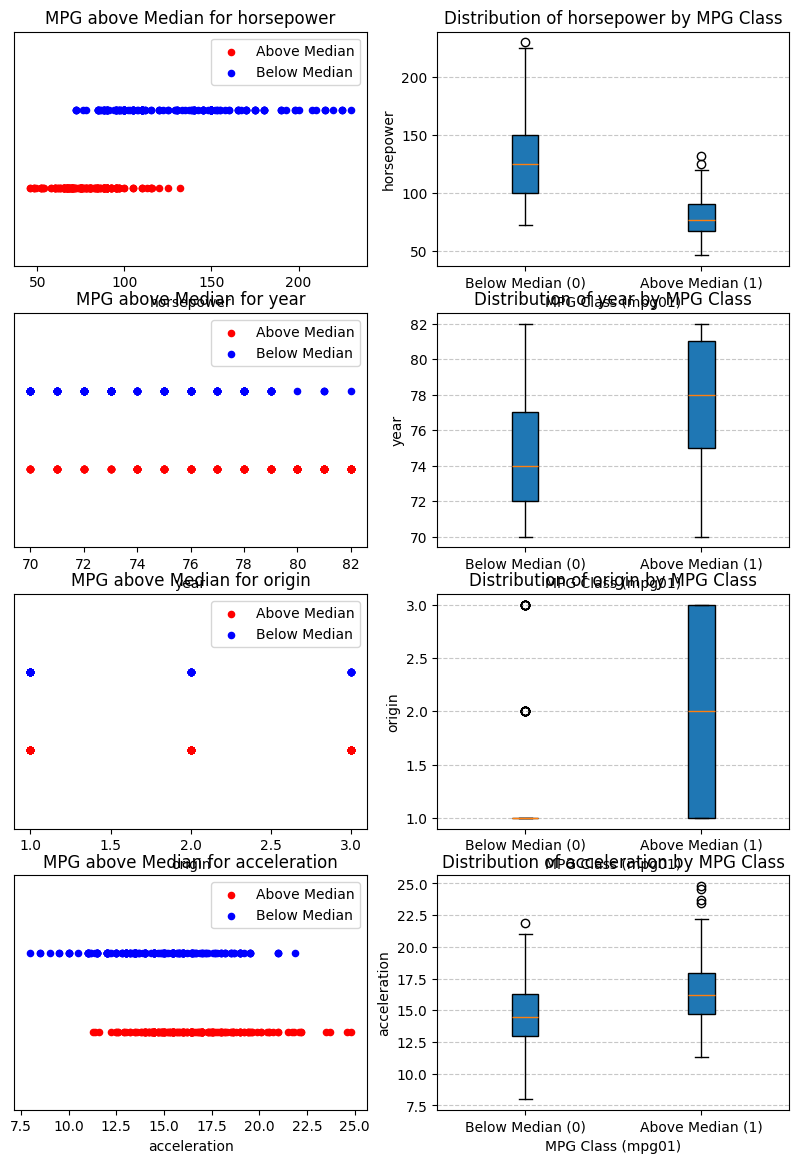

In [183]:
Y = Data['mpg01']

p_names = ['horsepower', 'year','origin',  'acceleration']
X = Data[p_names]



ax = plt.subplots(len(p_names),2, figsize = (10,14))[1]
for idx, p in enumerate(p_names):
    plot_classes(p, ax[idx][0])
    plot_boxes(p, ax[idx][1])




### Training test split

In [184]:
if(type(X) == pd.DataFrame):
    X = X.values
    Y = Y.values

#indexes
N = len(X)
idx = np.arange(N)
np.random.seed = 42
np.random.shuffle(idx)

train_idx = idx[:int(N*.8)]
val_idx = idx[int(N*0.8):]

#Predictor and Response
x_train, y_train = X[train_idx], Y[train_idx]
x_val, y_val = X[val_idx], Y[val_idx]

# To store metrics
Model_performence = {}

### Function for model quality

In [185]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, roc_auc_score, accuracy_score

def metrics(preds:np.ndarray, lables:np.ndarray, method:str):
    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, preds)
    roc_area = roc_auc_score(lables, preds)
    accuracy = accuracy_score(lables, preds)

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}

## LDA


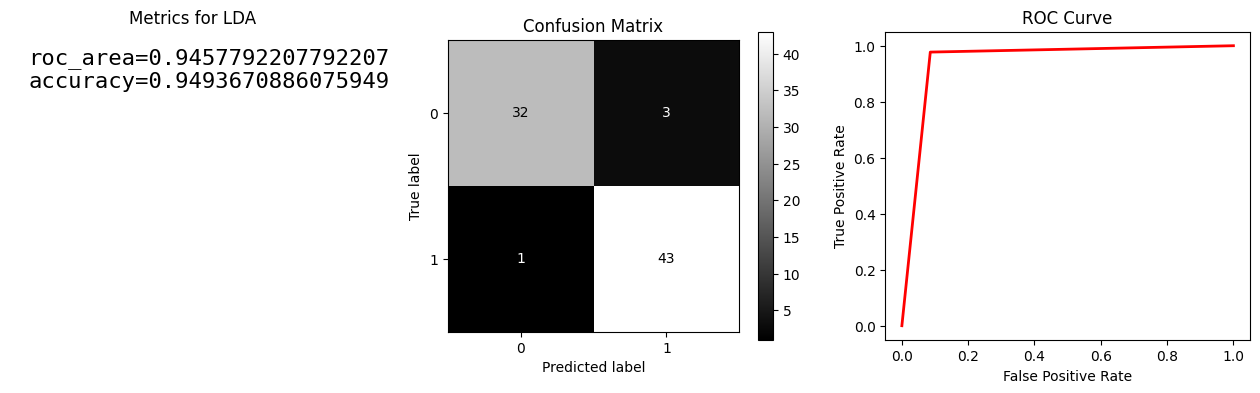

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_train, y_train)

y_pred = LDA_model.predict(x_val)

Model_performence['LDA'] = metrics(y_pred, y_val, "LDA")

## QDA


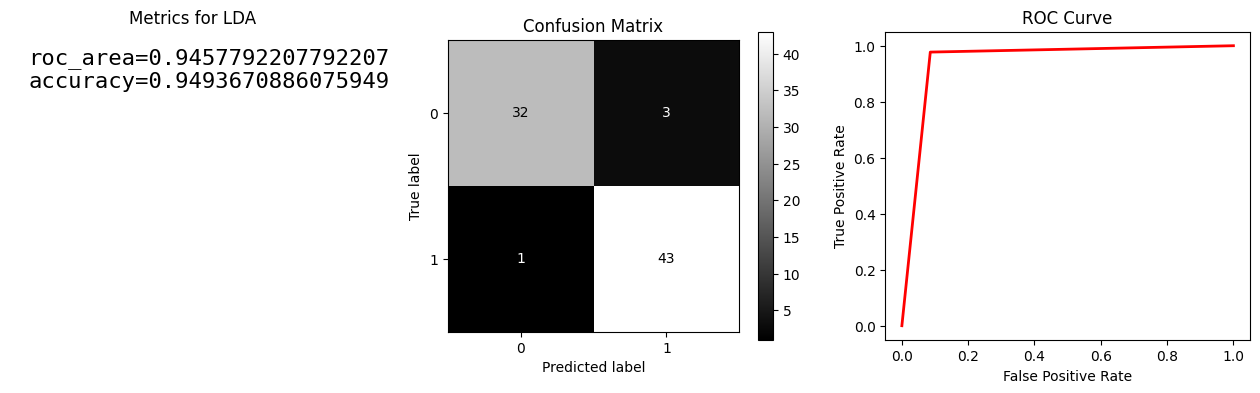

In [187]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(x_train, y_train)

y_pred = LDA_model.predict(x_val)

Model_performence['QDA'] = metrics(y_pred, y_val, "LDA")

## Logistic Regression

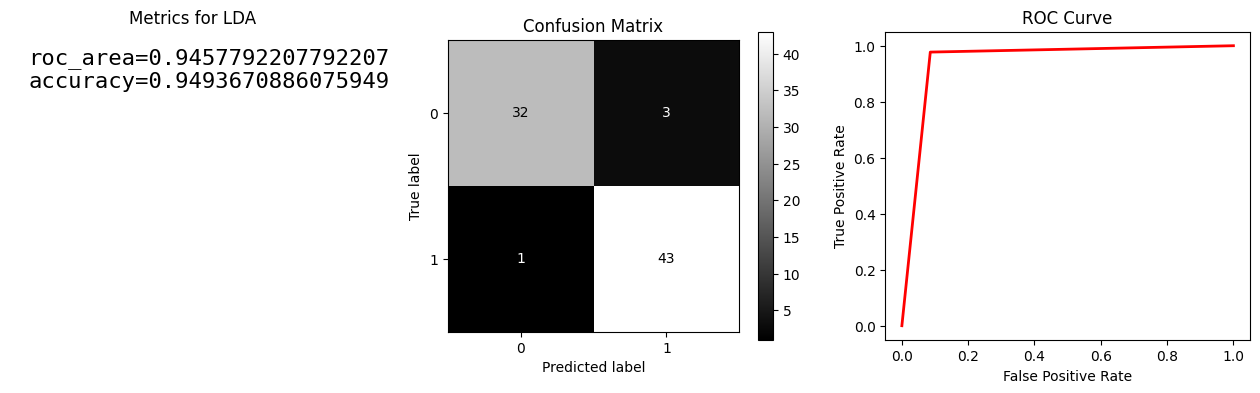

In [188]:
from sklearn.linear_model import LogisticRegression

logic_model = LogisticRegression()
logic_model.fit(x_train, y_train)

y_pred = LDA_model.predict(x_val)

Model_performence['Logi'] = metrics(y_pred, y_val, "LDA")

## Bayes


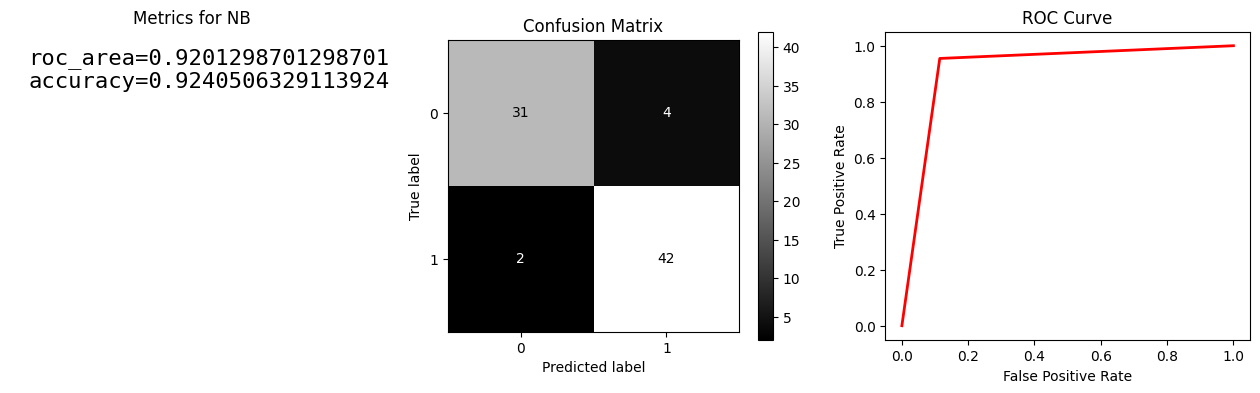

In [189]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
y_pred = NB_model.predict(x_val)

Model_performence['NB'] = metrics(y_pred, y_val, "NB")

## KNN

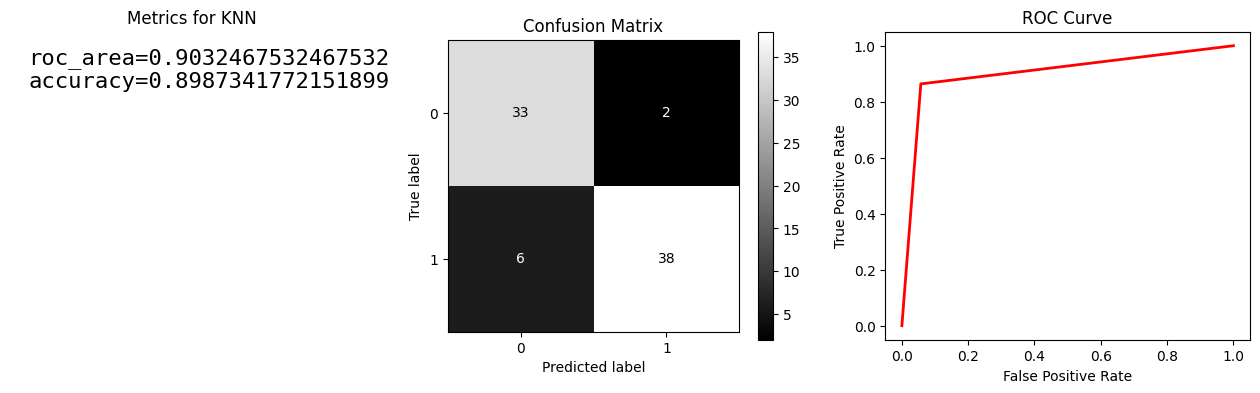

In [190]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_val)

Model_performence['KNN'] = metrics(y_pred, y_val, "KNN")